## Step 1

Let us first download five stocks for which we find plenty of news reports, analyst ratings and headlines.

In [326]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from scipy.optimize import minimize
np.set_printoptions(suppress=True, precision=10)
import random

the stocks chosen for this stock market are some big Indian companies and conglomerates: Tata Consultancy Services(TCS), Reliance Industries Limited(RIL), Maruti Suzuki Limited, Axis Bank, ITC.They represent the Technology, Chemical Industries and Fuel Refineries, Automobiles, Banking and FMCG sectors in that order.

Let us now download data regarding prices so that we have at least a 100 points regarding daily returns.

In [328]:
tickers = ['TCS.NS', 'RELIANCE.NS', 'MARUTI.NS','AXISBANK.NS', 'ITC.NS']
data = yf.download(tickers, start="2023-09-30", end="2024-05-01")["Close"]

[*********************100%***********************]  5 of 5 completed


In [330]:
data

Ticker,AXISBANK.NS,ITC.NS,MARUTI.NS,RELIANCE.NS,TCS.NS
Date,,,,,
2023-10-03,1040.247192,419.215027,10250.084961,1159.074951,3392.922363
2023-10-04,994.782227,415.735443,10035.064453,1157.074951,3415.999512
2023-10-05,1002.476318,415.687775,10114.614258,1157.050049,3465.824219
2023-10-06,1000.178101,421.502899,10205.653320,1159.000000,3496.770996
2023-10-09,995.481750,419.882324,10148.939453,1149.125000,3513.137695
...,...,...,...,...,...
2024-04-24,1062.430054,414.876678,12822.932617,1450.175049,3725.963135
2024-04-25,1126.130859,423.243866,12801.584961,1459.974976,3746.532959
2024-04-26,1129.428345,425.613770,12584.484375,1452.550049,3716.529297


I have downloaded the closing prices for all five stocks listed above. Now, I will calculate daily excess returns for all these stocks in percentage terms, and we will have 139 data points. This is calculated by subtracting the risk-free return percentage from the daily return percentage. I consider the 10y bond yield in India to be the risk-free return rate, which was ~7.2% in September 2023. (Link: https://in.investing.com/rates-bonds/india-10-year-bond-yield-historical-data). So, for the six-month period under consideration, the risk-free return is 3.5%

In [333]:
daily_returns = data.pct_change().dropna()*100

In [335]:
daily_returns = daily_returns - 3.5/140
daily_returns

Ticker,AXISBANK.NS,ITC.NS,MARUTI.NS,RELIANCE.NS,TCS.NS
Date,,,,,
2023-10-04,-4.395593,-0.855024,-2.122744,-0.197551,0.655156
2023-10-05,0.748445,-0.036466,0.767718,-0.027152,1.433569
2023-10-06,-0.254254,1.373916,0.875074,0.143528,0.867912
2023-10-09,-0.494551,-0.409475,-0.580710,-0.877028,0.443052
2023-10-10,1.581017,0.871800,1.245886,0.416636,-0.284732
...,...,...,...,...,...
2024-04-24,0.685400,-0.094905,-0.426657,-0.651996,-1.151525
2024-04-25,5.970765,1.991789,-0.191480,0.650775,0.527067
2024-04-26,0.267815,0.534938,-1.720888,-0.533565,-0.825838


Let us compute the total returns that these stocks have provided in this six-month period under consideration. Let us substract this from the risk-free returns to obtain the excess returns. I consider the 10y bond yield in India to be the risk-free return rate, which was ~7.2% in September 2023. (Link: https://in.investing.com/rates-bonds/india-10-year-bond-yield-historical-data). So, for the six-month period under consideration, the risk-free return is 3.5%

In [338]:
total_returns = data.pct_change(139).dropna()*100
total_returns = total_returns - 3.5
total_returns

Ticker,AXISBANK.NS,ITC.NS,MARUTI.NS,RELIANCE.NS,TCS.NS
Date,,,,,
2024-04-30,8.492706,-2.977369,20.377679,23.066448,6.01763


Reliance gave the most returns in this period, and ITC the least returns.

Let us now compute the correlation matrix of daily returns

In [342]:
daily_returns.cov()

Ticker,AXISBANK.NS,ITC.NS,MARUTI.NS,RELIANCE.NS,TCS.NS
Ticker,,,,,
AXISBANK.NS,2.280340,0.586847,0.416883,0.563410,0.083566
ITC.NS,0.586847,1.285420,0.296681,0.226361,0.120155
MARUTI.NS,0.416883,0.296681,1.631714,0.474462,0.122676
RELIANCE.NS,0.563410,0.226361,0.474462,1.481024,0.317991
TCS.NS,0.083566,0.120155,0.122676,0.317991,1.733347


Let us visualize the same using heatmaps.

<Axes: xlabel='Ticker', ylabel='Ticker'>

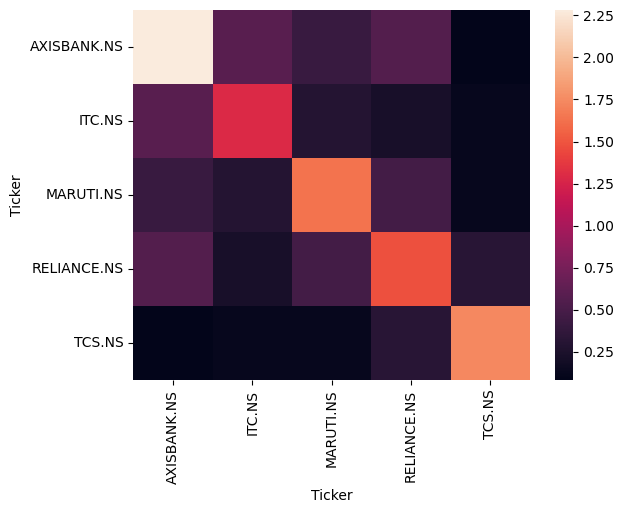

In [345]:
sns.heatmap(daily_returns.cov())

To get the better sense of how these stock prices are correlated, let us compute the correlation matrix now.

In [348]:
daily_returns.corr()

Ticker,AXISBANK.NS,ITC.NS,MARUTI.NS,RELIANCE.NS,TCS.NS
Ticker,,,,,
AXISBANK.NS,1.000000,0.342770,0.216119,0.306580,0.042033
ITC.NS,0.342770,1.000000,0.204854,0.164058,0.080496
MARUTI.NS,0.216119,0.204854,1.000000,0.305210,0.072945
RELIANCE.NS,0.306580,0.164058,0.305210,1.000000,0.198468
TCS.NS,0.042033,0.080496,0.072945,0.198468,1.000000


<Axes: xlabel='Ticker', ylabel='Ticker'>

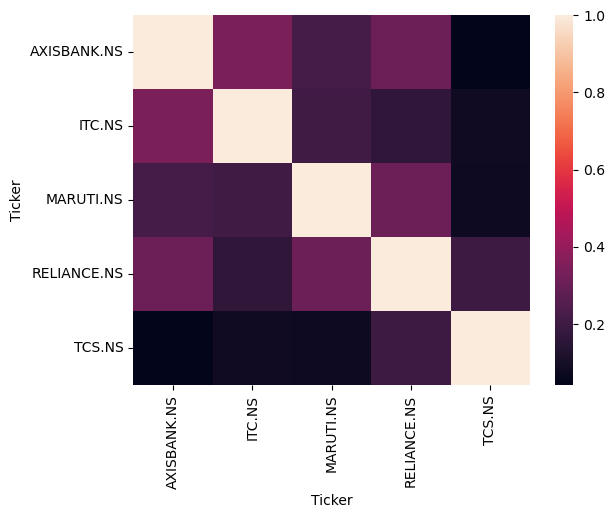

In [350]:
sns.heatmap(daily_returns.corr())

## Step 2

Let us now run a classic Markowitz Mean-Variance Optimization on this data for the five stock returns. 

In [354]:
#Calculating mean excess returns
mean_returns = daily_returns.mean()
mean_returns

Ticker
AXISBANK.NS    0.067804
ITC.NS        -0.014888
MARUTI.NS      0.137216
RELIANCE.NS    0.151912
TCS.NS         0.048985
dtype: float64

In [356]:
#Calculating the covariance matrix again
cov_matrix = daily_returns.cov()
cov_matrix

Ticker,AXISBANK.NS,ITC.NS,MARUTI.NS,RELIANCE.NS,TCS.NS
Ticker,,,,,
AXISBANK.NS,2.280340,0.586847,0.416883,0.563410,0.083566
ITC.NS,0.586847,1.285420,0.296681,0.226361,0.120155
MARUTI.NS,0.416883,0.296681,1.631714,0.474462,0.122676
RELIANCE.NS,0.563410,0.226361,0.474462,1.481024,0.317991
TCS.NS,0.083566,0.120155,0.122676,0.317991,1.733347


Let us now start the optimization process. Our objective here is to find the best combination of stock allocations that maximize the Sharpe ratio.

In [359]:
def portfolio_stats(weights, mean_returns, cov_matrix):
    #Portfolio return
    portfolio_return = np.sum(weights * mean_returns)
    #Portfolio volatility (standard deviation)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_return, portfolio_volatility, -(portfolio_return/portfolio_volatility) #the last value is the negative of the Sharpe ratio, which is to be minimised

In [361]:
def obj_function(weights, mean_returns, cov_matrix):
    return portfolio_stats(weights, mean_returns, cov_matrix)[2] #returns the negative of the Sharpe ratio

In [363]:
def constraint(weights): #sum of weights of must be 1
    return np.sum(weights) - 1

In [365]:
# Bounds for weights: Between 0 and 1 to allow as no short-selling is allowed
bounds = [(0, 1) for _ in range(len(tickers))]

In [367]:
# Initial guess for weights is equal weights for all stocks
initial_guess = [1 / len(tickers)] * len(tickers)

In [369]:
initial_guess

[0.2, 0.2, 0.2, 0.2, 0.2]

In [371]:
# Constraints
constraints = ({'type': 'eq', 'fun': constraint})

In [373]:
opt_results = minimize(obj_function, initial_guess, args=(mean_returns, cov_matrix),
                       method='SLSQP', bounds=bounds, constraints=constraints) #Sequential Least Squares Programming

In [375]:
optimal_weights = opt_results.x
optimal_return, optimal_volatility = portfolio_stats(optimal_weights, mean_returns, cov_matrix)[0:2]

let us now look at the results of the optimization.

In [378]:
opt_results

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.14497696826690826
       x: [ 0.000e+00  5.337e-18  3.973e-01  5.428e-01  5.984e-02]
     nit: 9
     jac: [ 3.922e-03  5.396e-02  1.247e-04 -2.351e-05 -6.360e-04]
    nfev: 55
    njev: 9

In [380]:
optimal_weights #Fractional terms

array([0.          , 0.          , 0.3973215482, 0.5428407699,
       0.059837682 ])

Let us see this graphically

Text(0.5, 1.0, 'Portfolio Weights After Optimization in Percentages')

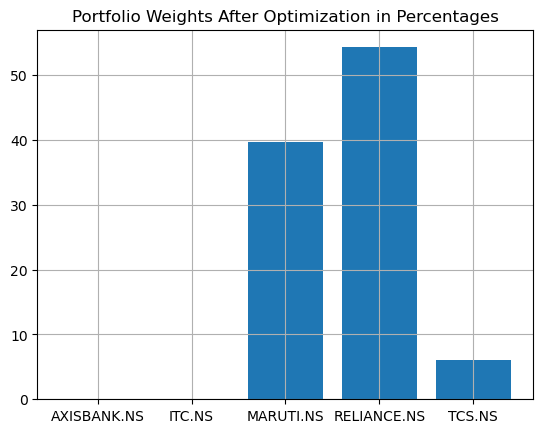

In [383]:
plt.bar(height=optimal_weights*100, x=daily_returns.columns)
plt.grid()
plt.title("Portfolio Weights After Optimization in Percentages")

## Step 3

For this step, I will follow the instructions of Prof. Maurisio Tiso, which are as follows: https://learn.wqu.edu/comments/6815a34c209e521752b58353

1) Starts with 20 assets (all equities)
2) Select 5 at random from the 20
3) For the 5 assets selected, perform an MVO and a 1/N portfolio (w= 0.20 for each of the 5 assets) using the part of the training data
4) Use the two portfolios and compute the return on both using the test data so to speak
5) repeat 2), 3), and 4) 5000 times (or more if you like) In this way you will have collected two sets of 5000 returns
6) draw a histogram of the two returns and compare their returns. Which one does produce a better performance? The MVO or the 1/N portfolio.

In [387]:
#20 popular stocks from the Indian market
tickers = ['RELIANCE.NS', 'TCS.NS', 'ITC.NS', 'AXISBANK.NS', 'INFY.NS', 'HINDUNILVR.NS', 'SUNPHARMA.NS', 'POWERGRID.NS', 'ASIANPAINT.NS', 'ADANIENT.NS', 'ADANIGREEN.NS', 'ADANIPORTS.NS', 'ADANIPOWER.NS', 'NDTV.NS', 'ATGL.NS', 'TITAN.NS', 'CDSL.NS', 'IRCTC.NS', 'IRFC.NS', 'AWL.NS']

In [389]:
#downloading prices for all 20 stocks, for both the train and test periods
stock_data = yf.download(tickers, start="2023-09-30", end="2024-05-01")["Close"]
test_data = yf.download(tickers, start="2024-05-02", end="2024-07-02")["Close"]

[*********************100%***********************]  20 of 20 completed
[*********************100%***********************]  20 of 20 completed


In [391]:
test_data.shape

(41, 20)

In [393]:
mvo_returns_overall = []
equal_weight_returns_overall = []
returns_comparison = {
    "mvo": 0,
    "1/n": 0
}

Let us now perform 5000 Monte-Carlo trials to see the distribution of returns for both the MVO and 1/N portfolios during the test perios for an investment of Rs. 1000.

In [396]:
for i in range(5000):
    #choose five stocks at random from the list
    tickers_selected = random.sample(range(0, 20), 5)
    #print(tickers_selected)
    stocks_selected = [tickers[j] for j in tickers_selected]
    #print(stocks_selected)

    
    #daily excess returns
    stock_returns = stock_data[stocks_selected].pct_change().dropna()* - 0.035

    #mean-variance optimization to find the optimal allocation
    mean_returns = stock_returns.mean()
    cov_matrix = stock_returns.cov()
    opt_results = minimize(obj_function, initial_guess, args=(mean_returns, cov_matrix), method='SLSQP', bounds=bounds, constraints=constraints)
    optimal_weights = opt_results.x

    
    #Comparing returns between an MVO and a 1/N portfolio over a subsequent test period.
    test_period_stock_returns = test_data[stocks_selected].pct_change(test_data.shape[0] - 1).dropna() - 0.035*41/140    #total excess returns for each stock
    mvo_returns = np.dot(list(test_period_stock_returns.iloc[0]), optimal_weights)*1000
    equal_weight_returns = np.dot(list(test_period_stock_returns.iloc[0]), [0.2, 0.2, 0.2, 0.2, 0.2])*1000

    #Storing the results of each trial
    mvo_returns_overall.append(mvo_returns)
    equal_weight_returns_overall.append(equal_weight_returns)

    if mvo_returns > equal_weight_returns:
        returns_comparison["mvo"] += 1
    else:
        returns_comparison["1/n"] += 1
    

In [397]:
returns_comparison

{'mvo': 2089, '1/n': 2911}

In [400]:
#list(test_period_returns.iloc[0])
#np.dot(list(test_period_returns.iloc[0]), optimal_weights)
#np.dot(list(test_period_returns.iloc[0]), [0.2, 0.2, 0.2, 0.2, 0.2])

Text(0.5, 1.0, 'Distribution of Returns on MVO Portfolio')

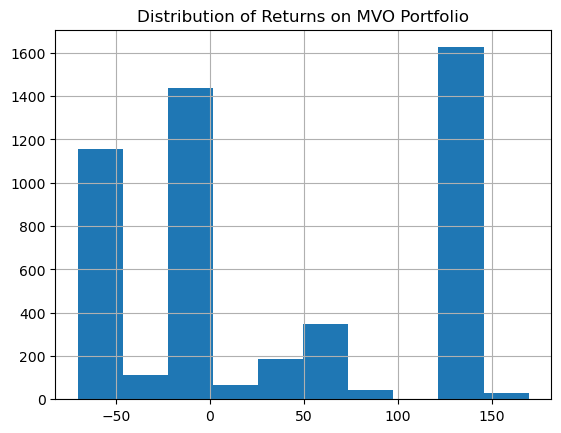

In [402]:
plt.hist(mvo_returns_overall)
plt.grid()
plt.title("Distribution of Returns on MVO Portfolio")

Text(0.5, 1.0, 'Distribution of Returns on 1/N Portfolio')

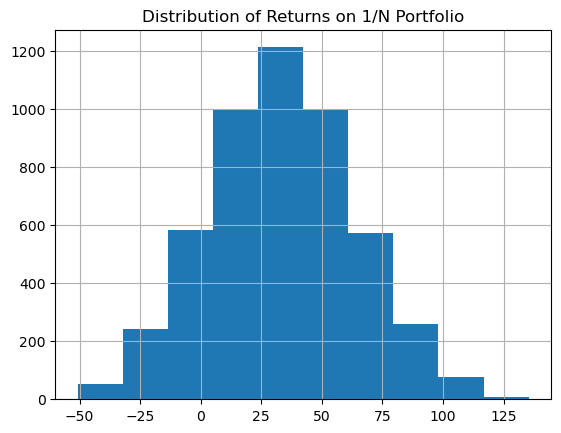

In [404]:
plt.hist(equal_weight_returns_overall)
plt.grid()
plt.title("Distribution of Returns on 1/N Portfolio")

In [406]:
np.average(mvo_returns_overall)

29.88817233701877

In [408]:
np.average(equal_weight_returns_overall)

33.479077143714015

## Step 4

Let us now implement the Black-Litterman Model for the five original stocks

In [412]:
tickers = ['TCS.NS', 'RELIANCE.NS', 'MARUTI.NS','AXISBANK.NS', 'ITC.NS']
#our original dataframe containing daily returns
daily_returns

Ticker,AXISBANK.NS,ITC.NS,MARUTI.NS,RELIANCE.NS,TCS.NS
Date,,,,,
2023-10-04,-4.395593,-0.855024,-2.122744,-0.197551,0.655156
2023-10-05,0.748445,-0.036466,0.767718,-0.027152,1.433569
2023-10-06,-0.254254,1.373916,0.875074,0.143528,0.867912
2023-10-09,-0.494551,-0.409475,-0.580710,-0.877028,0.443052
2023-10-10,1.581017,0.871800,1.245886,0.416636,-0.284732
...,...,...,...,...,...
2024-04-24,0.685400,-0.094905,-0.426657,-0.651996,-1.151525
2024-04-25,5.970765,1.991789,-0.191480,0.650775,0.527067
2024-04-26,0.267815,0.534938,-1.720888,-0.533565,-0.825838


In [414]:
cov_matrix = daily_returns.cov() #covariance matrix

In [416]:
#market capitalisation weights
market_cap = [3.73e12, 5.44e12, 3.91e12, 19.44e12, 13.09e12]  # Market caps in INR

In [418]:
market_weights = np.array(market_cap)/sum(market_cap)

In [420]:
market_weights

array([0.0817803113, 0.1192720895, 0.0857268143, 0.4262223197,
       0.2869984652])

Let us now calculate the risk aversion parameter

In [423]:
market_index = yf.download("^NSEI", start="2023-09-30", end="2024-05-01")["Close"]

[*********************100%***********************]  1 of 1 completed


In [425]:
market_index

Ticker,^NSEI
Date,
2023-10-03,19528.750000
2023-10-04,19436.099609
2023-10-05,19545.750000
2023-10-06,19653.500000
2023-10-09,19512.349609
...,...
2024-04-24,22402.400391
2024-04-25,22570.349609
2024-04-26,22419.949219


In [427]:
market_returns = market_index.pct_change(market_index.shape[0] - 1).dropna()*100 #market returns

In [429]:
market_returns

Ticker,^NSEI
Date,
2024-04-30,15.751646


In [431]:
market_volatility = (market_index.pct_change().dropna()*100).var()
market_volatility[0]

C:\Users\susha\AppData\Local\Temp\ipykernel_160020\2637774796.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_volatility[0]


0.5010495736016912

So, the market has given 15% returns overall in this period. For calculating the risk-free rate, I consider the 10-year bond yield, which was 7.2% in September 2023. I consider the rate to be 3.5% for the six-month period we are considering.

In [434]:
risk_aversion = (market_returns.iloc[0, 0] - 3.5)/market_volatility.iloc[0]
risk_aversion

24.451964149268782

Now, I define the views on each stock. This is the subjective view on the expected returns each stock will give in the following test data period of two months. These views are averages of expected returns based on analyst projections and investor calls fromt the year 2023. 

In [497]:
P = np.array([
    [0, 0, 1, 0, 0],  # View on Maruti
    [0, 0, 0, 1, 0],  # View on Axis Bank
    [0, 0, 0, 0, 1],  # View on ITC
    [1, 0, 0, 0, 0],  # View on TCS
    [0, 1, 0, 0, 0],  # View on RIL
])

Q = np.array([
    5.33,  # Maruti 5.33% upside
    8.16,  # Axis Bank 8.16% upside
    1.25,  # ITC 1.25% upside
    1.7,  # TCS 1.7% upside
    7   # RIL 7% upside
])

Now, let us calculate the Black-Litterman Expected Returns

In [500]:
omega = np.diag([0.0001] * len(Q))  # High confidence in each view
implied_returns = risk_aversion * cov_matrix.dot(market_weights)
tau = 0.05  # Scalar for uncertainty in the prior
adjusted_cov = np.linalg.inv(np.linalg.inv(tau * cov_matrix) + P.T @ np.linalg.inv(omega) @ P)
adjusted_returns = adjusted_cov @ (np.linalg.inv(tau * cov_matrix) @ implied_returns + P.T @ np.linalg.inv(omega) @ Q)

In [502]:
print("Black-Litterman Adjusted Returns", adjusted_returns)

Black-Litterman Adjusted Returns [1.7082261082 6.9953832168 5.3314156013 8.1704388386 1.2652014972]


In [504]:
implied_returns

Ticker
AXISBANK.NS    13.603623
ITC.NS          8.746593
MARUTI.NS      10.924997
RELIANCE.NS    20.448122
TCS.NS         16.252844
dtype: float64

In [506]:
#Optimization
def portfolio_sharpe_ratio(weights):
    portfolio_return = np.dot(weights, adjusted_returns)
    portfolio_volatility = np.sqrt(weights.T @ cov_matrix @ weights)
    return -(portfolio_return - 3.5)/portfolio_volatility #minimize the negative of the Sharpe Ratio

constraints = [{'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}]
bounds = [(0, 1) for _ in range(len(tickers))]
initial_weights = market_weights

result = minimize(portfolio_volatility, initial_weights, bounds=bounds, constraints=constraints)

In [508]:
result

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.7448787127013505
       x: [ 7.679e-02  2.956e-01  1.943e-01  1.849e-01  2.484e-01]
     nit: 7
     jac: [ 7.445e-01  7.442e-01  7.451e-01  7.454e-01  7.452e-01]
    nfev: 42
    njev: 7

In [570]:
optimal_weights_bl = pd.Series(result.x, index=tickers).round(4)
optimal_weights_bl

TCS.NS         0.0768
RELIANCE.NS    0.2956
MARUTI.NS      0.1943
AXISBANK.NS    0.1849
ITC.NS         0.2484
dtype: float64

As you can see, this allocation of weights is not as extreme as the one we got for the MVO portfolio in Step 1. 

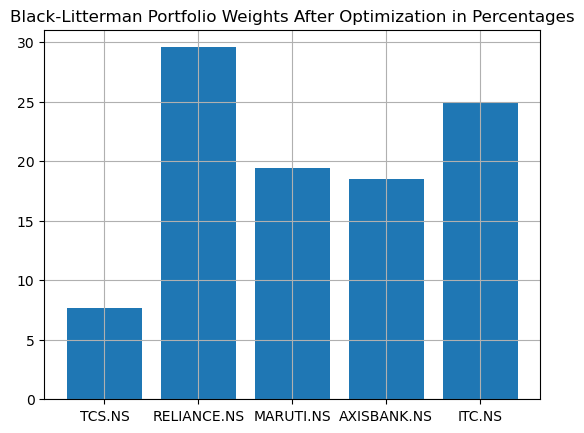

In [573]:
plt.bar(height=optimal_weights_bl*100, x=optimal_weights_bl.index)
plt.grid()
plt.title("Black-Litterman Portfolio Weights After Optimization in Percentages")
plt.savefig("bl_model.png")

Let us now compare how both the methods far on the test data period.

In [487]:
test_data = yf.download(tickers, start="2024-05-02", end="2024-07-02")["Close"]

[*********************100%***********************]  5 of 5 completed


In [489]:
test_data.head()

Ticker,AXISBANK.NS,ITC.NS,MARUTI.NS,RELIANCE.NS,TCS.NS
Date,,,,,
2024-05-02,1148.963257,424.646484,12685.530273,1466.550049,3757.328613
2024-05-03,1140.619751,422.179840,12375.261719,1434.000000,3737.974365
2024-05-06,1142.768066,420.535431,12322.905273,1419.525024,3813.494385
2024-05-07,1126.830322,425.952332,12248.359375,1401.474976,3869.805908
2024-05-08,1127.779663,426.581055,12426.179688,1418.550049,3867.861084


In [555]:
test_period_returns = test_data.pct_change(test_data.shape[0] - 1).dropna()
test_period_returns

Ticker,AXISBANK.NS,ITC.NS,MARUTI.NS,RELIANCE.NS,TCS.NS
Date,,,,,
2024-07-01,0.097448,-0.00533,-0.054407,0.063823,0.037226


In [557]:
optimal_weights_bl

TCS.NS         0.0768
RELIANCE.NS    0.2956
MARUTI.NS      0.1943
AXISBANK.NS    0.1849
ITC.NS         0.2484
dtype: float64

In [559]:
#rearranging in alphabetical order to match the returns data 
optimal_weights_bl = [0.1849, 0.2484, 0.1943, 0.2956, 0.0768]

In [561]:
#Optimal Weights of the earlier MVO optimization
optimal_weights_mvo = [0, 0, 0.3973215482, 0.5428407699, 0.059837682 ]

In [563]:
bl_portfolio_returns = np.dot(list(test_period_returns.iloc[0]), optimal_weights_bl)*1000
bl_portfolio_returns

27.84778473268059

In [565]:
mvo_portfolio_returns = np.dot(list(test_period_returns.iloc[0]), optimal_weights_mvo)*1000
mvo_portfolio_returns

15.256312800132184

The Black-Litterman portfolio yields better returns when compared to the MVO portfolio.

In [579]:
equal_weight_portfolio_returns = np.dot(list(test_period_returns.iloc[0]), [0.2, 0.2, 0.2, 0.2, 0.2])*1000
equal_weight_portfolio_returns

27.751818803541383

The 1/N portfolio yields returns that are nearly the same as that for the Black-Litterman Model